In [56]:
import pandas as pd
import numpy as np

In [57]:
data  = pd.read_csv("resultat.csv", sep=",")
data

row    col         x          y  class   B2   B3   B4    B5    B6  \
0         497  10974  809710.0  4895040.0     30  443  836  753  1396  2990   
1         497  10975  809720.0  4895040.0     30  407  808  693  1390  2936   
2         497  10976  809730.0  4895040.0     30  496  858  778  1401  2889   
3         497  10977  809740.0  4895040.0     30  547  872  806  1405  2914   
4         497  10978  809750.0  4895040.0     30  525  878  768  1400  3012   
...       ...    ...       ...        ...    ...  ...  ...  ...   ...   ...   
4907224  9568  10747  807440.0  4804330.0     30  566  965  855  1411  2268   
4907225  9568  10748  807450.0  4804330.0     30  556  955  889  1411  2252   
4907226  9568  10786  807830.0  4804330.0     30  216  367  266   592  1416   
4907227  9568  10787  807840.0  4804330.0     30  273  471  338   592  1381   
4907228  9568  10788  807850.0  4804330.0     30  191  305  233   613  1525   

           B7   B8A   B11   B12      date  
0        3355  3585  2327  1323  20180421  
1        3299  3523  2316  1314  20180421  
2        3288  3544  2411  1347  20180421  
3        3319  3628  2510  1401  20180421  
4        3394  3776  2613  1476  20180421  
...       ...   ...   ...   ...       ...  
4907224  2461  2583  2142  1353  20181023  
4907225  2446  2568  2163  1396  20181023  
4907226  1663  1980  1176   565  20181023  
4907227  1624  1973  1142   541  20181023  
4907228  1795  2168  1138   531  20181023  

[4907229 rows x 15 columns]

In [58]:
list_date = np.array(data.date) #conversion en tableau de type numpy

list_date = np.unique(list_date) #supprimer les doublons de chaque date 
list_date

array([20180419, 20180421, 20180506, 20180511, 20180521, 20180620,
       20180623, 20180625, 20180630, 20180708, 20180713, 20180715,
       20180723, 20180725, 20180802, 20180804, 20180812, 20180819,
       20180827, 20180901, 20180903, 20180908, 20180911, 20180916,
       20180923, 20180926, 20180928, 20181003, 20181006, 20181023])

In [59]:
def extraction_bande(fichier, date, B):
    df = pd.read_csv(fichier, sep=",") #lecture
    donnee = df[df.date == date] 
    donnee = donnee[["row", "col", B]] #extraction des elements
    return donnee


In [60]:
file = extraction_bande("resultat.csv", 20180421, "B11")
file

row    col   B11
0        497  10974  2327
1        497  10975  2316
2        497  10976  2411
3        497  10977  2510
4        497  10978  2613
...      ...    ...   ...
149731  9568  10747  1111
149732  9568  10748  1125
149733  9568  10786  1690
149734  9568  10787  1700
149735  9568  10788  1668

[149736 rows x 3 columns]

In [61]:
A = np.array(file)
print(A)

[[  497 10974  2327]
 [  497 10975  2316]
 [  497 10976  2411]
 ...
 [ 9568 10786  1690]
 [ 9568 10787  1700]
 [ 9568 10788  1668]]


In [62]:
# compute minimal and maximal indexes for rows and columns
row_min = file["row"].min()
row_max = file["row"].max()
col_min = file["col"].min()
col_max = file["col"].max()
row_min, row_max, col_min, col_max


(497, 9568, 10504, 10979)

In [63]:
#compute the number of rows and columns
nbrow = row_max - row_min +1
nbcol = col_max - col_min +1
nbrow, nbcol

(9072, 476)

In [64]:
#create image matrix
C = np.zeros((nbrow, nbcol))
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# Get spectra values
nrow, nbcol = A.shape
for k in range(nrow):
    i = A[k][0] - row_min
    j = A[k][1] - col_min
    C[i][j] = A[k][2]
    
C

array([[   0.,    0.,    0., ..., 2510., 2613., 2661.],
       [   0.,    0.,    0., ..., 2535., 2613., 2648.],
       [   0.,    0.,    0., ..., 2428., 2480., 2504.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

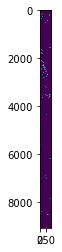

In [66]:
from matplotlib import pyplot as plt
plt.imshow(C, interpolation='nearest')
plt.show()